<a href="https://colab.research.google.com/github/lpoggetto/aulas_machine_learning_FIAP/blob/main/atividade_grupo_ML_01_20240917.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando os pacotes utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ATIVIDADE (Em grupo) 1: Estatística

1. Escolha uma base de dados no https://www.kaggle.com/datasets, e se familiarize com sua base
2. Faca análises estatísticas
3. Apresente o histograma ok
4. Calcule os quartis ok
5. Apresente o boxplot ok
6. Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

Dados utilizados: https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors

In [3]:
#Importando os dados
df = pd.read_csv('/content/Customer Purchasing Behaviors.csv')

In [4]:
# primeira visualizacao dos dados
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [9]:
# separando variaveis numericas para fazer histograma boxplot
df_num = df.select_dtypes(include=['int64','float64'])
df_num.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
0,1,25,45000,200,4.5,12
1,2,34,55000,350,7.0,18
2,3,45,65000,500,8.0,22
3,4,22,30000,150,3.0,10
4,5,29,47000,220,4.8,13


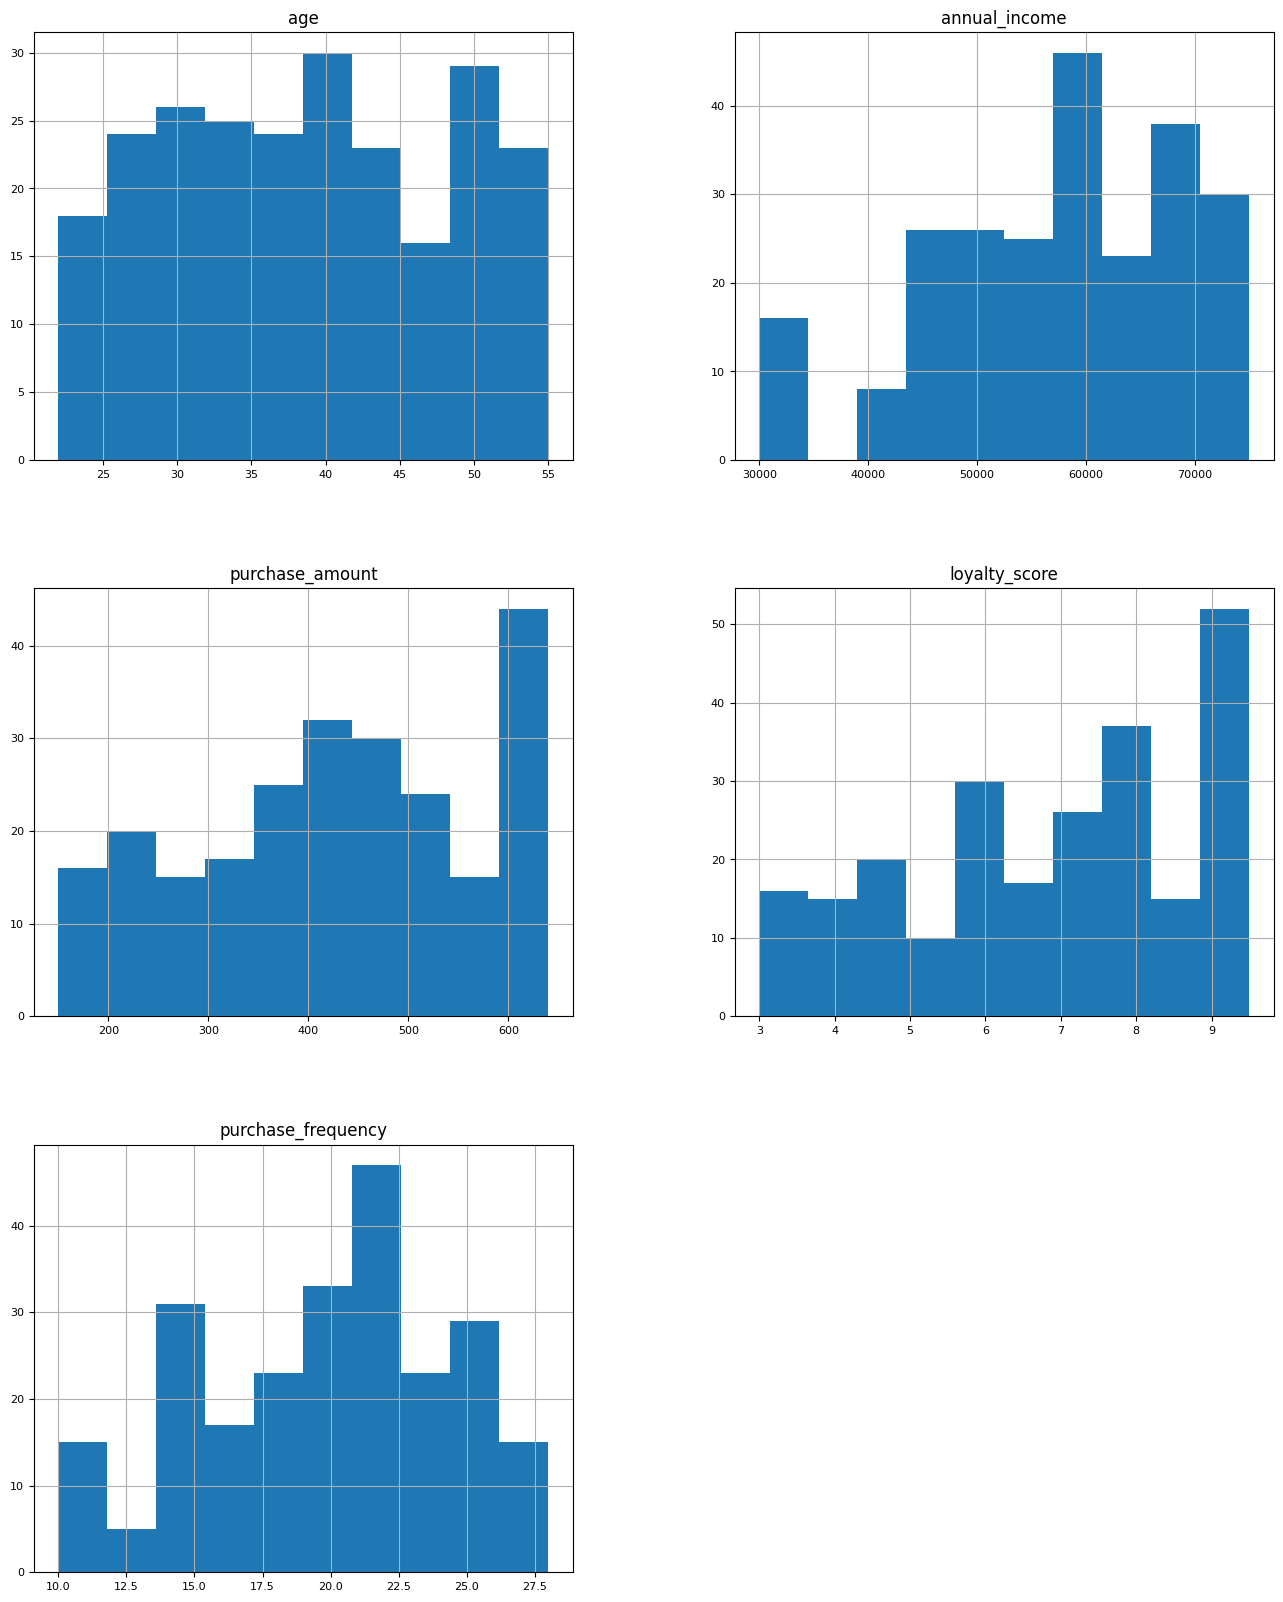

In [13]:
# plotando um histograma para cada variavel numerica exceto user_id
df_num.drop('user_id', axis=1, inplace=True)
df_num.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8);

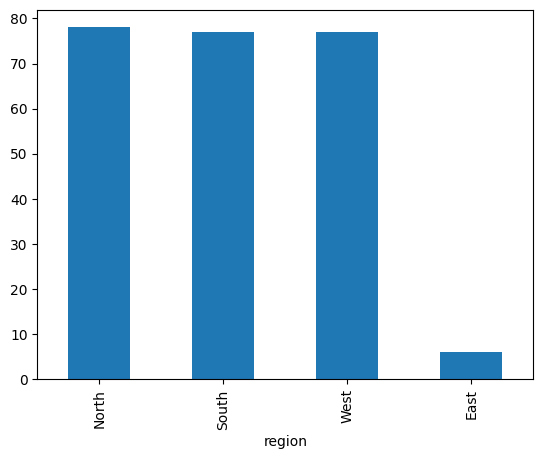

In [27]:
df['region'].value_counts().plot(kind='bar')
plt.show()

In [18]:
# Calculando os quartis para cada variavel numerica
df_num.describe()

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,38.676471,57407.563025,425.630252,6.794118,19.798319
std,9.351118,11403.875717,140.052062,1.899047,4.562884
min,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,46.750000,66750.000000,527.500000,8.275000,23.000000
max,55.000000,75000.000000,640.000000,9.500000,28.000000


In [19]:
# calculando a idade media por regiao
df.groupby('region')['age'].mean()

,age
region,
East,31.666667
North,34.358974
South,38.000000
West,44.272727


In [28]:
# Criando figura e eixos do grafic
fig, axes = plt.subplots(1, len(df_num.columns), figsize=(16, 6))

# iterando pelas colunas e gerando os subplots
for i, col in enumerate(df_num.columns):
  sns.boxplot(y=df_num[col], ax=axes[i], orient="v")

# Ajustando layout
plt.tight_layout()
plt.show()


SyntaxError: unterminated string literal (detected at line 7) (<ipython-input-28-69c315aeeec1>, line 7)

In [34]:
# agrupando por regiao e calculando a media e mediana
df.groupby('region')[df_num.columns].agg(['mean', 'median'])

age        annual_income          purchase_amount         \
             mean median          mean   median            mean median   
region                                                                   
East    31.666667   32.0  49000.000000  51000.0      320.000000  330.0   
North   34.358974   31.0  53038.461538  51000.0      358.589744  340.0   
South   38.000000   39.0  55766.233766  57000.0      416.883117  440.0   
West    44.272727   48.0  64129.870130  68000.0      510.519481  550.0   

       loyalty_score        purchase_frequency         
                mean median               mean median  
region                                                 
East        5.400000   5.55          16.666667   17.0  
North       5.865385   5.60          17.653846   17.0  
South       6.725974   7.00          19.467532   21.0  
West        7.911688   8.50          22.545455   24.0

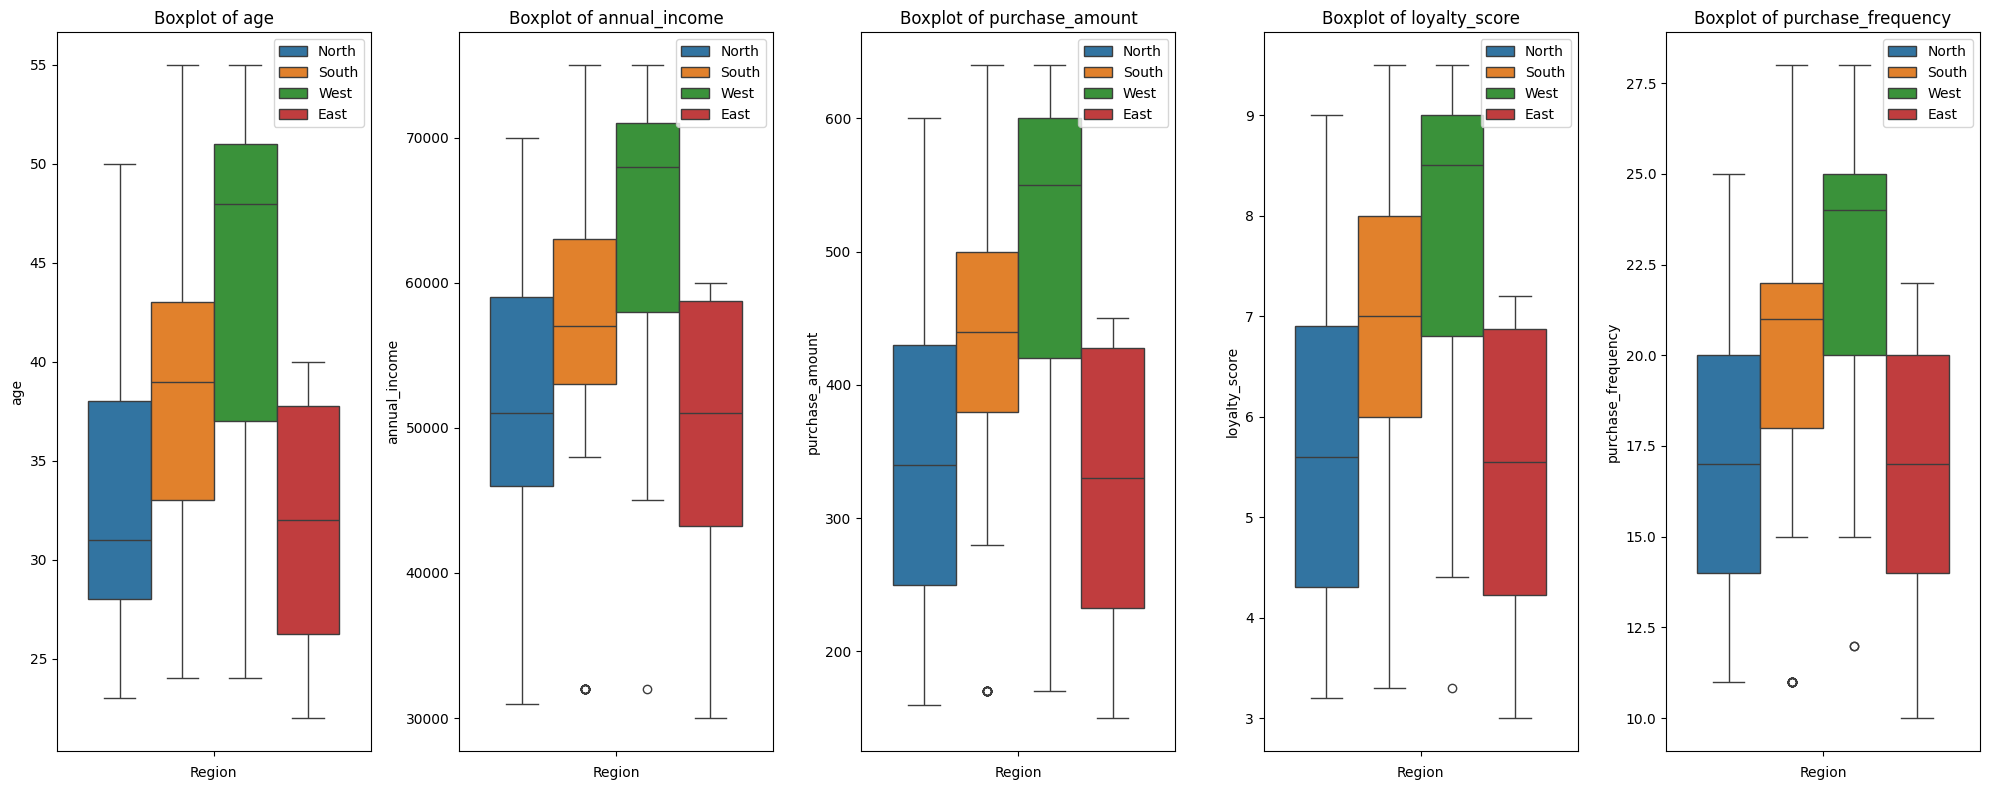

In [39]:
# Creating figure and axes for the plots
fig, axes = plt.subplots(1, len(df_num.columns), figsize=(20, 8))

# Iterating over the columns and generating the subplots
for i, col in enumerate(df_num.columns):
  sns.boxplot(y=df_num[col], hue=df['region'], ax=axes[i])
  axes[i].set_title(f'Boxplot of {col}')
  axes[i].set_xlabel('Region')
  axes[i].set_ylabel(col)
  axes[i].legend(loc='upper right')

# Adjusting layout
plt.tight_layout()
plt.show()